# Solutions for Homework 7 - Make up
**Due: Nov 28** 

***Total Points: 100***

For full points, your code
- must run without errors
- must by *pythonic*
- must be easily understandable, and well documented (either through inline comments or markdown).
- All plots must have clearly and meaningfully labeled axes, unless you are simply plotting arbitrary numbers. Add legends where needed.
- **Use separate markdown cells for any text answers.**
- **Show your work, i.e, print all relevant output.** Remember that having a variable in the last line of a jupyter cell block automatically prints it's value. You can use multiple code blocks for a single question.
- Please see the solutions (and related notes) for the previous HWs, as well as the comments on your submissions, before submitting this assignment. We will be less lenient for repeated mistakes.
- ***All code must be wrapped in functions and/or classes. Avoid global variables.***

Remember to export your Jupyter notebook as a PDF file and upload both to Canvas.
```
File > Save and Export Notebook As... > PDF
```

Run every code block (and make sure the answer if fully visible) before submitting your notebook/PDF.

## Question 0


**For every question in this HW: *All code must be wrapped in functions and/or classes. Avoid global variables.***

Import `numpy` and `matplotlib` below.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Problem 1

*30 points*

Suppose that a machine sells bottles of Coke and only accepts coins in these denominations: 25 cents, 10 cents, and 5 cents.

Write a function that is takes an optional keyword argument for the price of a bottle (use a default value of $1.15).
- The function should prompt the user to insert a coin, one at a time, each time informing the user of the amount due.
- Once the user has inputted at least the price of the bottle, output how many cents in change the user is owed. If no change is owed, state that explicitly.
- Prompt the user to only input cents (as integers), reprompt the user if a denomination other than the three given above is inputted.
- Demonstrate the function for both cases: when the user enters coins for the exact price, and when change is due.

In [2]:
def buy_coke(price=115):
    coins = [5, 10, 25]
    paid = 0

    while paid < price:
        due = price - paid
        print(f"Amount due: {due}")
        while True:
            coin_input = int(input(f"Insert a coin {coins}: "))
            if coin_input in coins:
                paid += coin_input
                break
            else:
                print(f"Allowed denominations: {coins}")
                
    print("")
    change = paid - price
    if change == 0:
        print("No change due.")
    else:
        print(f"Change due: {change}")

In [3]:
# Demonstrate where change is due
buy_coke()

Amount due: 115


Insert a coin [5, 10, 25]:  25


Amount due: 90


Insert a coin [5, 10, 25]:  25


Amount due: 65


Insert a coin [5, 10, 25]:  25


Amount due: 40


Insert a coin [5, 10, 25]:  25


Amount due: 15


Insert a coin [5, 10, 25]:  25



Change due: 10


In [6]:
# Demonstrate where no change is due
buy_coke()

Amount due: 115


Insert a coin [5, 10, 25]:  25


Amount due: 90


Insert a coin [5, 10, 25]:  25


Amount due: 65


Insert a coin [5, 10, 25]:  10


Amount due: 55


Insert a coin [5, 10, 25]:  5


Amount due: 50


Insert a coin [5, 10, 25]:  25


Amount due: 25


Insert a coin [5, 10, 25]:  25



No change due.


## Problem 2

*35 points*

Create a `class` called `CookieJar` with these methods:
- `__init__` should initialize an empty cookie jar with the given `capacity`, which represents the maximum number of cookies that can fit in the cookie jar. Use a default value of `42`. If capacity is not a non-negative int, though, it should raise a ValueError.
- `__str__` should return a str with  🍪, where  is the number of cookies in the cookie jar. For instance, if there are 3 cookies in the cookie jar, then str should return "🍪🍪🍪"
- `deposit` should add `n` cookies to the cookie jar. If adding that many would exceed the cookie jar’s capacity, though, deposit should instead raise a `ValueError`.
- `withdraw` should remove `n` cookies from the cookie jar. If there aren’t that many cookies in the cookie jar, though, `withdraw` should instead raise a `ValueError`.
- `capacity` should return the cookie jar’s capacity. If the capacity is changed directly, so that it is lower than the number of cookies already in the jar, it should raise a `ValueError`.
- `num_cookies` should return the number of cookies actually in the cookie jar.

*(HINT: The last two methods should be properties)*

**Write your class in the code cell below. Run the provided code (without changes) after completion. Some of them should result in an error.**

In [7]:
class CookieJar:
    
    def __init__(self, capacity=42):
        self._num_cookies = 0
        self.capacity = capacity

    def __str__(self):
        cookie = "🍪"
        return f"{cookie*self.num_cookies}"

    def deposit(self, n):
        """Add cookies to the jar."""
        self.num_cookies += n

    def withdraw(self, n):
        """Remove cookies from the jar."""
        self.num_cookies -= n

    @property
    def capacity(self):
        """Maximum number of cookies in the jar"""
        return self._capacity
    
    @capacity.setter
    def capacity(self, capacity):
        if not isinstance(capacity, int):
            raise ValueError("Jar capacity must be an integer.")
        if capacity < 0:
            raise ValueError("Jar capacity must be non-negative.")
        if capacity < self.num_cookies:
            raise ValueError(f"The jar currently has {self.num_cookies} cookies. Withdraw some cookies before reducing its capacity.")
        self._capacity = capacity

    @property
    def num_cookies(self):
        """Current number of cookies in the jar."""
        return self._num_cookies

    @num_cookies.setter
    def num_cookies(self, num_cookies):
        if num_cookies > self.capacity:
            raise ValueError(f"Jar is overflowing! It can only fit {self.capacity} cookies.")
        if num_cookies < 0:
            raise ValueError(f"Don't be greedy! There are only {self.num_cookies} cookies in the jar.")
        self._num_cookies = num_cookies

In [8]:
# Should raise an error
jar = CookieJar(capacity=-1)

ValueError: Jar capacity must be non-negative.

In [9]:
# Should raise an error
jar = CookieJar(capacity=1.5)

ValueError: Jar capacity must be an integer.

In [10]:
# Should print an empty string
jar = CookieJar()
print(jar)

In [11]:
# Should raise an error
jar.deposit(50)
print(jar)

ValueError: Jar is overflowing! It can only fit 42 cookies.

In [12]:
jar.deposit(10)
print(jar)

🍪🍪🍪🍪🍪🍪🍪🍪🍪🍪


In [13]:
# Should raise an error
jar.withdraw(25)
print(jar)

ValueError: Don't be greedy! There are only 10 cookies in the jar.

In [14]:
jar.withdraw(5)
print(jar)

🍪🍪🍪🍪🍪


In [15]:
jar.capacity

42

In [16]:
jar.num_cookies

5

In [17]:
# Should raise an error
jar.capacity = 2

ValueError: The jar currently has 5 cookies. Withdraw some cookies before reducing its capacity.

## Question 3

*35 points*

Based on the data in `populations.txt`, compute and print:

- The mean and std of the populations of each species (hares, lynxes, and carrots) for the years in the period.
- Which year each species had the largest population (*HINT: `np.argmax()`*).
- Which species has the largest population for each year.
- Which years any of the populations is above a user-specified threshold, with a default of 60,000 (*HINT: `np.any()`*).
- The top `n` years for each species when they had the lowest populations. Use a default of `n=3`.
- Compare (plot) the change in hare population and the number of lynxes (*HINT: `np.gradient()`*). Set the proper `xticks` for your plot. Plot both variables on the same plot. Use two y axes, one for each variable. Set the color of each y axis label to be the same as the color of the respective curve, so you don't need to have a legend.
- Check correlation between the two quantities above (*HINT: `np.corrcoef()`*). Comment on the results of the correlation and the plot.

**Do not loop over the arrays or DataFrame items to perform operations. You can use loops to simplify your prints.** *Hint: use `zip()`*

**Make sure all your prints are easily readable. Do not simply print lists/arrays with no headings or descriptions.** 

Use a comma separator for every thousands and 2 decimal spaces for all prints, except the year (e.g., `1,234.56`). Do not use any `round` function.

In [19]:
class Population:
    
    def __init__(self, data):
        self.data = data
        self.years, self.hares, self.lynxes, self.carrots = self.data.T
        self.years = self.years.astype("int")

        self.species = np.array(["Hares", "Lynxes", "Carrots"])
        self.populations = [self.hares, self.lynxes, self.carrots]
        self.pop_array = self.data[:,1:]

        
    def get_stats(self):
        for specie, population in zip(self.species, self.populations):
            print(specie)
            print(f"Mean: {population.mean():,.2f}, Standard deviation: {population.std():,.2f}")
            print("")
            
    def get_highest_pop_specie(self):
        for specie, population in zip(self.species, self.populations):
            print(specie)
            j_max_years = np.argmax(population)
            print(f"Max. year: {self.years[j_max_years]}")
            print("")
            
    def get_highest_pop_year(self):
        max_species_idx = np.argmax(self.pop_array, axis=1)
        max_species = self.species[max_species_idx]
        print("Max species:")
        for year, max_specie in zip(self.years, max_species):
            print(f"{year}: {max_specie}")
            
    def get_years_above_threshold(self, threshold=60000):
        above_threshold = np.any(self.pop_array > threshold, axis=1)
        print(f"Any population above {threshold}:", self.years[above_threshold])
        
    def get_lowest_pop_years(self, num=2):
        print(f"Top {num} years with lowest populations for:")
        for specie, population in zip(self.species, self.populations):
            j_top_2 = np.argsort(population)[:num]
            print(f"{specie}: {self.years[j_top_2]}")
            
    def plot_comparison(self):
        hare_grad = np.gradient(self.hares, 1.0)
        
        # Create fig and ax objects
        fig, ax_hare = plt.subplots()

        # Plot theta
        ax_hare.plot(self.years, hare_grad, "b")
        ax_hare.set_xlabel("Year")
        ax_hare.set_xticks(self.years[::2]);
        ax_hare.set_ylabel("Change in hare population", color="b")

        # Create second y axis by twinning the x axis
        ax_lynx = ax_hare.twinx()

        # Plot omega
        ax_lynx.plot(self.years, -self.lynxes, "r")
        ax_lynx.set_ylabel("Lynx population", color="r");
        
        return fig
    
    def get_correlation(self):
        hare_grad = np.gradient(self.hares, 1.0)
        corr = np.corrcoef(hare_grad, self.lynxes)[0,1]
        print(f"diff(Hares) vs. Lynxes correlation: {corr}")

        return corr

In [20]:
data_pop = np.genfromtxt('populations.txt')
pop = Population(data=data_pop)

In [21]:
pop.get_stats()

Hares
Mean: 34,080.95, Standard deviation: 20,897.91

Lynxes
Mean: 20,166.67, Standard deviation: 16,254.59

Carrots
Mean: 42,400.00, Standard deviation: 3,322.51



In [22]:
pop.get_highest_pop_specie()

Hares
Max. year: 1903

Lynxes
Max. year: 1904

Carrots
Max. year: 1900



In [23]:
pop.get_highest_pop_year()

Max species:
1900: Carrots
1901: Carrots
1902: Hares
1903: Hares
1904: Lynxes
1905: Lynxes
1906: Carrots
1907: Carrots
1908: Carrots
1909: Carrots
1910: Carrots
1911: Carrots
1912: Hares
1913: Hares
1914: Hares
1915: Lynxes
1916: Carrots
1917: Carrots
1918: Carrots
1919: Carrots
1920: Carrots


In [24]:
pop.get_years_above_threshold(60000)

Any population above 60000: [1902 1903 1913]


In [25]:
pop.get_lowest_pop_years(3)

Top 3 years with lowest populations for:
Hares: [1917 1916 1918]
Lynxes: [1900 1901 1910]
Carrots: [1916 1903 1906]


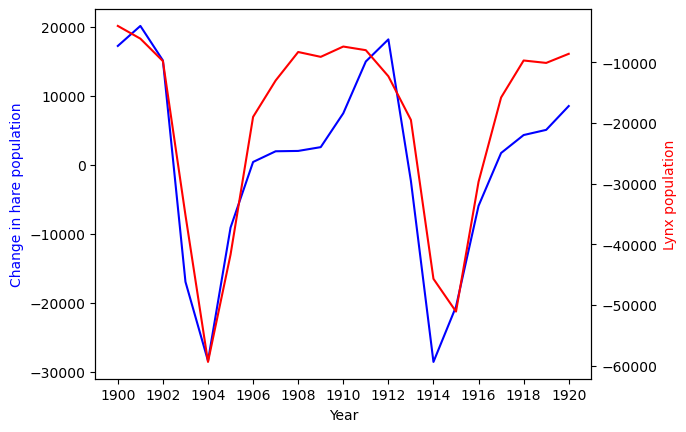

In [26]:
fig = pop.plot_comparison()

In [27]:
corr = pop.get_correlation()

diff(Hares) vs. Lynxes correlation: -0.9179248480315341
